# Analyzing Evictions in the City of San Francisco

## Stat 159, Spring 2023

Group members: Yiran Li, Carrie Hu, Angelo Punzalan, Oona Risse Adams

In this notebook, we will take in the Eviction_Notices.csv file from [data.gov](https://catalog.data.gov/dataset/eviction-notices) and analyze any possible patterns of evictions in San Francisco. 

San Francisco is known as one of the more expensive cities to live in the United States, ranking number 20 in the [2022-2023 U.S. News Rankings](https://realestate.usnews.com/places/rankings/most-expensive-places-to-live). Within San Francisco, there are a myriad of different neighborhoods, each with their own unique aesthetic. However, the good sides always come with the bad. Seeing as how rent prices keep getting higher and more difficult to afford within the Bay Area, we decided to analyze some data and see if there were any particular reasons tenants got evicted other than inability to pay rent.

For the first step of our data, we have to load it in. We import the necessary packages and use pandas to use the pd.read_csv() function in order to load the dataframe in:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tools import utils as ul

## Data Cleaning

The first step that we took to cleaning San Francisco eviction data was to select the relevant columns, including the address and file dates. The columns dropped are ones including access to police and other services. The question at hand is to interrogate the relationship between location and eviction cause, so access to public goods and services is not relevant to this stage of the analysis. Then, we dropped the rows which were missing values, for the ease of analysis. Finally, we randomly sampled the complete data to mitigate the impacts of an underlying correlation between the completeness of the eviction order and the location of the residence.

In [2]:
evictions = pd.read_csv('data/Eviction_Notices.csv', engine='python', on_bad_lines='skip')
bad_reasons = evictions[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 
                     'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 
                     'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']].dropna()

sample = bad_reasons.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)

sample['File Date'] = pd.to_datetime(sample['File Date'])
sample['year'] = pd.DatetimeIndex(sample['File Date']).year
sample['month'] = pd.DatetimeIndex(sample['File Date']).month

sample.head()

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods,year,month
93108,M170981,3800 Block Of Fulton Street,2017-04-12,False,False,False,False,False,False,False,False,Outer Richmond,2017,4
11136,M172485,500 Block Of Capp Street,2017-10-10,False,True,False,False,False,False,False,False,Mission,2017,10
17185,M172258,0 Block Of Guerrero Street,2017-09-11,False,False,False,True,False,False,False,False,Mission,2017,9
130887,E981930,1300 Block Of 10th Avenue,1998-08-24,False,False,False,False,False,False,False,False,Inner Sunset,1998,8
129823,E981149,0 Block Of Cambon Drive,1998-05-27,False,False,False,False,False,False,False,False,Lakeshore,1998,5


### Basic Visualization

To visualize the data, we decided to create bar graphs to generate an idea of the number of eviction notices in each Neighborhood, Year, and Month.

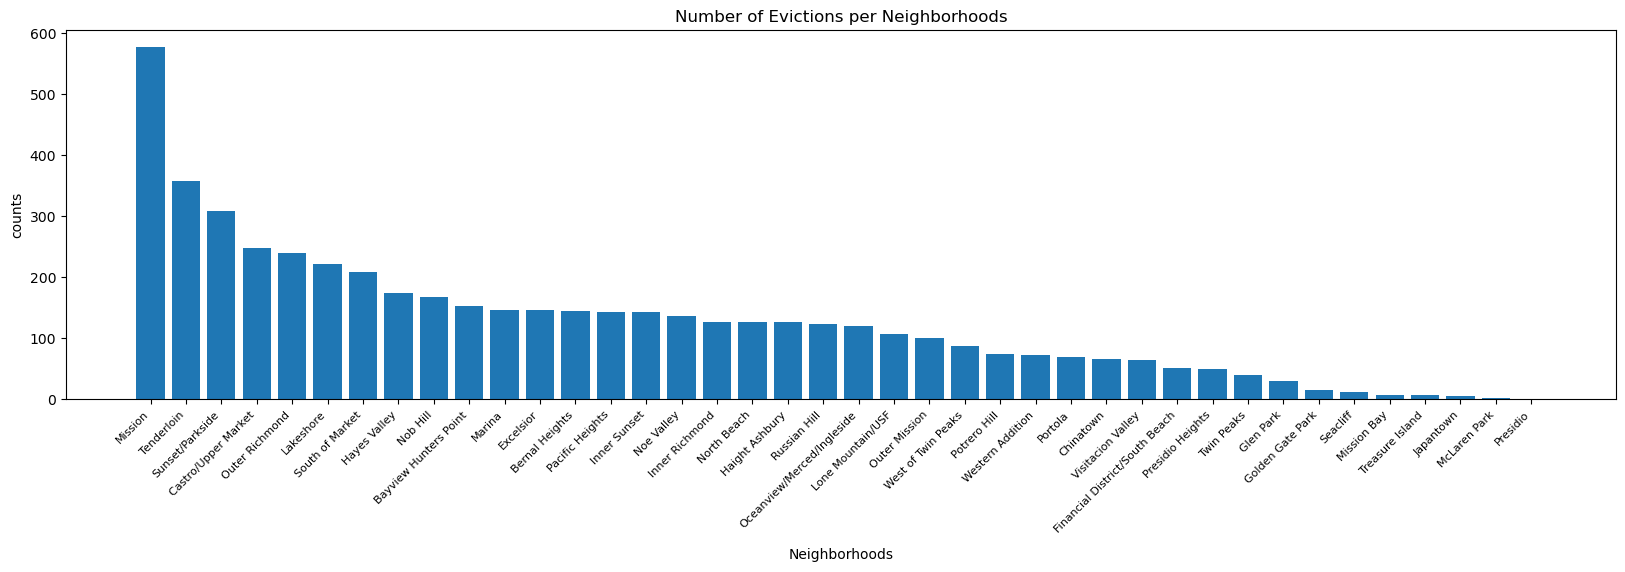

In [4]:
ul.get_count_plot(sample, 'Neighborhoods')

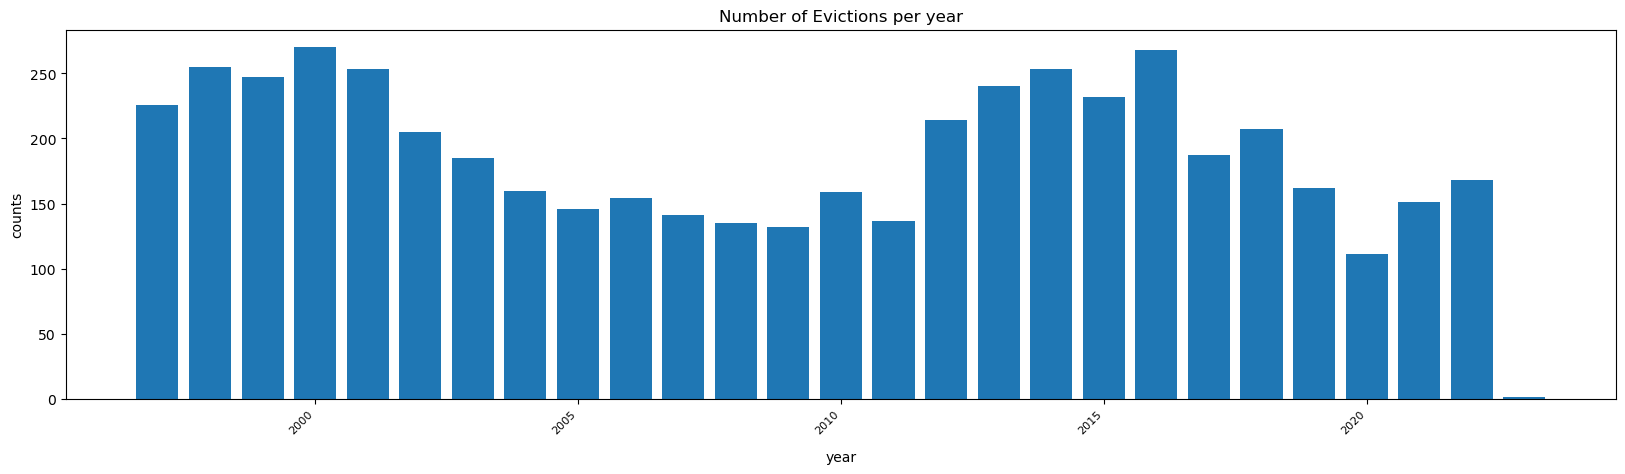

In [5]:
ul.get_count_plot(sample, 'year')

Through this basic visualization, we see that the Mission is the Neighborhood with the highest number of evictions. From 1997 - 2023, the highest number of evictions in San Francisco was during 2000. The month with the highest number of evictions is August.

In [7]:
#Finding the Exact Number of Evictions per Reason
reasons = sample.iloc[:, 3:11]
for col in reasons.columns:
    print(sample[[col]].value_counts().reset_index(name='counts'))

   Non Payment  counts
0        False    4611
1         True     389
   Nuisance  counts
0     False    4037
1      True     963
   Illegal Use  counts
0        False    4898
1         True     102
   Unapproved Subtenant  counts
0                 False    4897
1                  True     103
   Demolition  counts
0       False    4856
1        True     144
   Ellis Act WithDrawal  counts
0                 False    4555
1                  True     445
   Late Payments  counts
0          False    4820
1           True     180
   Failure to Sign Renewal  counts
0                    False    4989
1                     True      11


{'Non Payment': 389, 'Nuisance': 963, 'Illegal Use': 102, 'Unapproved Subtenant': 103, 'Demolition': 144, 'Ellis Act WithDrawal': 445, 'Late Payments': 180, 'Failure to Sign Renewal': 11}


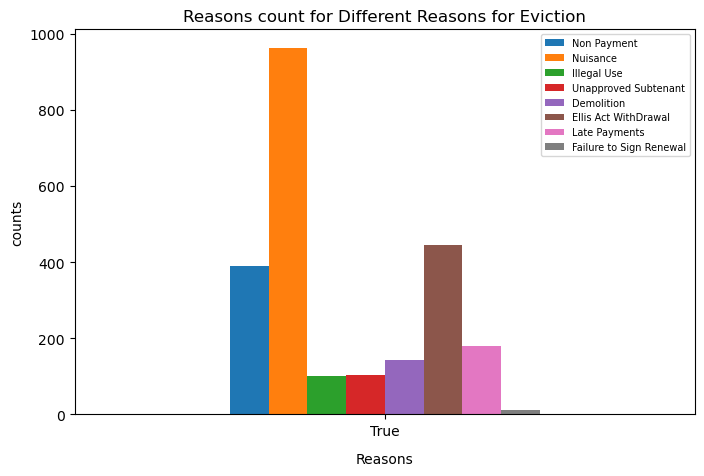

In [8]:
def reason_for_evict(df, names):
    """
    This function aims to get the total number of the reasons for eviction for each different reason,
    and display the result in the form of a barplot.
    The arugument 'names' is a list of the names for certain eviction reasons that you want to look into.
    """
    
    #self.names = names
    reasons = df[names]
    
    columnNames = reasons.columns
    
    # create an empty dictionary for the reasons that has TRUE input for future counts
    trues_oc = {}

    # get the total number of TRUE observations for each reason of eviction and print it 
    for i in reasons.columns:
        trues_oc[i] = reasons[i].sum()
    print(trues_oc)

    # make it into a dataframe for plotting purpose
    argh = pd.DataFrame(trues_oc, ['True'], columnNames).reset_index()
    #print(argh)

    # print the result
    reasons_list = [column for column in argh.columns]
    #print(reasons_list)
    reasons_bar = argh.plot(figsize=(8,5), x='index', y=reasons_list[1:], kind='bar', rot=0)
    plt.xlabel('Reasons', labelpad = 10)
    plt.ylabel('counts')
    plt.title("Reasons count for Different Reasons for Eviction")
    plt.legend(loc='best', fontsize='7')


names = ['Non Payment', 'Nuisance', 'Illegal Use', 
                     'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 
                     'Failure to Sign Renewal']

reason_for_evict(sample, names)

The most common reason for evictions in San Francisco from 1997 - 2022 is Nuisance, followed by an Ellis Act Withdrawl. The high number of Ellis Act Withdrawl evictions is of note.

The Ellis Act Evictions come from the [“Ellis Act”]( https://sftu.org/ellis/), a California state law which states that landlords have the ability to evict all of the tenants in a building if they do not single out a single tenant. The point of the Ellis Act is typically to do construction to an apartment, the landlord may not just replace currently residing tenants with another. However, Ellis Act Evictions are typically used to transform rental properties into condominiums, going against the main intent of the Act.

### Conclusion
From the basic EDA, we see that there are indeed some areas of San Francisco that experience much higher numbers of evictions than others. In the sample, we saw that there were over 500 evictions in the Mission, but close to none in the Presidio. Our team believed that there would be a relatively even distribution of evictions around San Francisco, evidently that was not true. One way to explain this disparity is the type of housing/number of units of housing in each building but would require further research and data collection. Another metric we measured, Number of Evictions per year, showed that there is no easily discernible trend in the Number of Evictions per year. Our team thought that there would be more evictions around 2008 as that would coincide with the Housing Market Crash of 2008 – 2009, but evictions were at a relatively low in comparison to 2000 or 2016. One further question that this proposes is an in-depth investigation to the rental market in 2008. This data suggests that volatility in the housing market does not necessarily translate to the rental market. Ultimately, the bulk our data analysis found that the three leading causes of eviction in San Francisco from 1997 – 2022 would be Nuisance, Ellis Act Withdrawal and Non Payment. This reflects a hostile relationship with tenants is primary eviction, especially something as general as a ‘Nuisance’. A large number of tenants are also evicted if the landlords decide to change the structure of the property. Through this exploratory data analysis, we can ask further clarifying questions to answer what the nature of evictions in San Francisco is.